# Assignment: Visualizing fMRI Data for Empathy
## Author: Karolína Nováková
# Date: 23.11.2024
### Source: https://neurosynth.org/analyses/terms/empathy/

# STEP 2 : **Writing a code that locates MRI automically**

In this step we import all packages that we need for the assigment (nibabel, nilearn, matplotlip, glob,...)

I used the `glob` to automatically locate all `.nii` files in the directory:
- The wildcard `*.nii` searches for files with the `.nii` extension.
- Files are assigned to variables (`anatomical_data` and `uniformity_test_data`) based on their filenames.
- This avoids hardcoding file paths, making the code more robust and portable.

In [ ]:
import nibabel as nib
import nilearn.plotting as plotting 
import matplotlib.pyplot as plt
import glob


#code locating the MRI data automically - no hardcoding -> using the glob
# we use the glob because we want to find all files of a specific type (so in this case files containing the .nii ) within the directory without telling it exactly where the files is located (aka desktop,etc..)
# we use (*) aka the wildcard that searches for any file with the .nii ending

Files_MRI = glob.glob("*.nii")


#defining the variables before the loop to avoid "not defined" error
anatomical_data = None
uniformity_test_data = None



for x in Files_MRI: 
    if x.startswith("anatomical"):
        anatomical_data = x
    if x.startswith("uniformity_test"):
        uniformity_test_data = x
print (anatomical_data, uniformity_test_data)

#we put every file ending with .nii that is in the same directory in the variable called "Files_MRI"
#from that variable we called/defined the files that we need (the two files we downloaded from neurosynth) into variables
#using a for loop that iterates over all the variables in Files_MRI

#I am not sure if I am correct, but my solution was to simply do this (do not know if this counts sa harccoding or not)
#I however like your solution better, it is a bit more dynamic.
from nilearn.image import load_img
anatomical_img = load_img(glob.glob("*anatomical.nii"))
functional_img = load_img(glob.glob("*olfactory_uniformity-test_z_FDR_0.01.nii"))


anatomical.nii uniformity_test.nii


## STEP 3 : **Visualising the functional data on top of the anatomical scan**

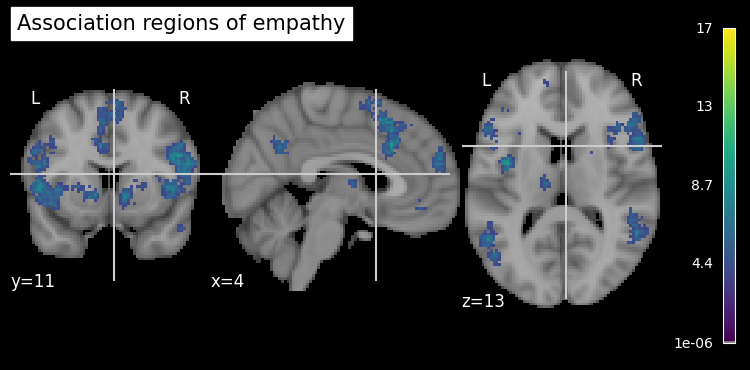

In [57]:
# Step 3: Visualize the functional data on top of the anatomical scan using nilearn
plotting.plot_stat_map(uniformity_test_data, bg_img=anatomical_data, #first the uniformity test will be displayed and the bg_img says that the anatomical scan is the background of the picture 
    title="Association Regions of Empathy",  # title
    cmap="viridis",                    # displays the colormap of the plot 
    vmin=0.1,                      # Voxel threshold meaning that it excluedes the values below mentioned - for this it excludes values below 0.1
    cut_coords=(4, 11, 13),         # XYZ coordinates for the brain cuts
    colorbar=True,                 # displays the colorbar
    annotate=True,                 # annotates the brain regions
    draw_cross=True,               # draws a cross on the plot/image
    black_bg=True                  # uses black background
)

#shows the plot we coded
plotting.show()

### STEP 4 : **Plot a histogram of the values in the functional data file**

This cell creates a histogram of positive values from the functional data

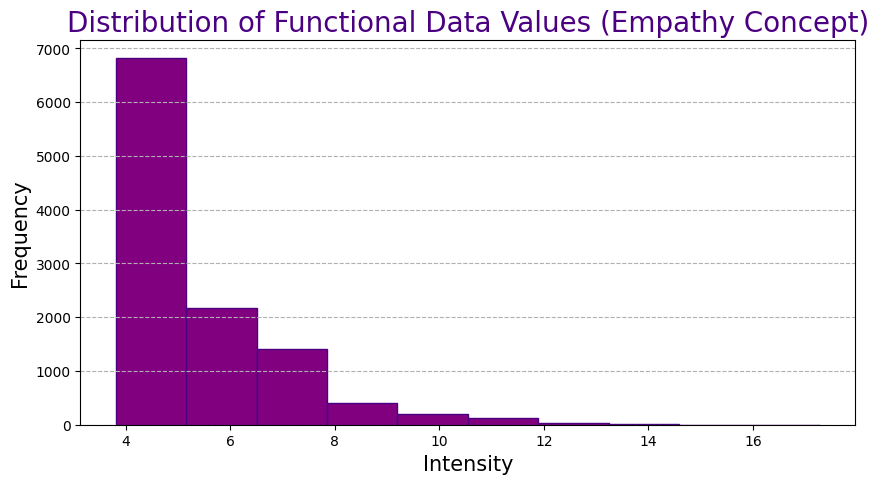

In [134]:

functional_image = nib.load(uniformity_test_data) #this loads the image from the file path
functional_data = functional_image.get_fdata() #this pulls out the numerical data from the loaded image file and puts it a numpy array

positive_values = functional_data[functional_data > 0]

# Plots the histogram
plt.figure(figsize=(10, 5))
plt.hist(positive_values, color="purple", edgecolor="indigo")  #shows only positive values, changes the color of the histogam, plt.hist is saying to make histogram
plt.title("Distribution of Functional Data Values (Empathy Concept)", fontsize=20, color="indigo")  # title of the plot
plt.xlabel("Intensity", fontsize=15)  # this labels the x-axis and gives it fontsize
plt.ylabel("Frequency", fontsize=15)  # this labels the y-axis label and gives it font size

# Additional
plt.grid(axis='y', linestyle='--')  # adds grid lines to the y-axis for better visibility

# Show the histogram
plt.show()

## Finished!

The notebook should visualize 2 things:
1. A brain map of regions associated with "empathy".
2. A histogram displaying the distribution of functional data values.